# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

In [409]:
import numpy as np
import pandas as pd

import sqlite3 as sql

In [410]:
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

In [600]:
db = sql.connect("baseball.sqlite")

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [412]:
#Problem1
#Get payrolls for each team each year from the database
result = pd.read_sql("""
    SELECT l.payrolls,l.yearID,l.teamID,r.name FROM
        (SELECT SUM(salary) AS payrolls,* FROM Salaries 
        GROUP BY teamID,yearID Having yearID BETWEEN 2006 AND 2016 ) AS l
    INNER JOIN
        Teams AS r
    ON (l.teamID = r.teamID AND l.yearID = r.yearID)
    ORDER by payrolls DESC LIMIT 20
""", db)
result

,payrolls,yearID,teamID,name
0,231978886,2013,NYA,New York Yankees
1,223362196,2013,LAN,Los Angeles Dodgers
2,222997792,2016,NYA,New York Yankees
3,221288380,2016,LAN,Los Angeles Dodgers
4,217014600,2014,LAN,Los Angeles Dodgers
5,215792000,2015,LAN,Los Angeles Dodgers
6,212751957,2015,NYA,New York Yankees
7,207896789,2008,NYA,New York Yankees
8,206333389,2010,NYA,New York Yankees
9,202275028,2011,NYA,New York Yankees


1.1.1: New York Yankees,Los Angeles Dodgers,Detroit Tigers,Boston Red Sox and Philadelphia Phillies had the highest payrolls.

In [575]:
#Problem2
#subset the five teams having highest payroll 
five_teams = pd.read_sql("""
    SELECT l.payrolls as payrolls,l.yearID,l.teamID,r.name FROM
        (SELECT SUM(salary) AS payrolls,* FROM Salaries 
        GROUP BY teamID,yearID Having yearID BETWEEN 2006 AND 2016 ) AS l
    INNER JOIN
        Teams AS r
    ON (l.teamID = r.teamID AND l.yearID = r.yearID)
    WHERE name IN(
        'New York Yankees','Los Angeles Dodgers','Detroit Tigers','Boston Red Sox','Philadelphia Phillies'
    )
""", db)

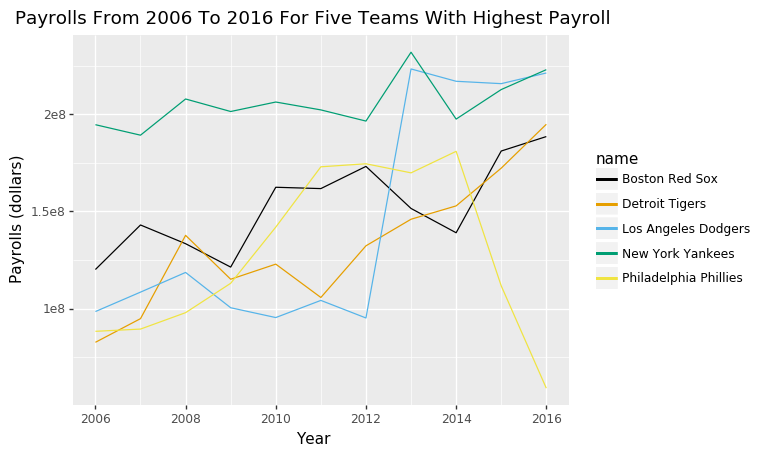

<ggplot: (7555449334)>

In [445]:
(
    ggplot(five_teams,aes(x = 'yearID',y = 'payrolls',color = 'name')) + geom_line()
    +scale_colour_manual(values=["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442"])
    +labs(title = "Payrolls From 2006 To 2016 For Five Teams With Highest Payroll",y = 'Payrolls (dollars)',x = 'Year')
)

1.1.2 Over this time period, the general trend is that the payrolls of all five teams hava an increasing trend. The exception is that a huge decrease occurs from 2014 to 2016 for Philadelphia Phillies; however, the general trend for Philadelphia Phillies is still an increase before 2014.

1.1.3 Two anomalies in the payrolls over this time period are that: there is a huge and sudden decrease in the payrolls for Philadelphia Phillies in 2015 and 2016; and there is a huge and sudden increase in the payrolls for Los Angeles Dodgers in 2013.

As for Philadelphia Phillies, players named Cole Hamels, Chase Utley, Jonnathan Papelbon, A.J.Burnett and Jimmy Rollins left team in 2014, and their salaries took about 42.13 percent of the payrolls of Philadelphia Phillies in 2015. Philadelphia Phillies only need to pay their retained salaries or do not need pay for them in 2015. So, there is a huge and sudden decrease in 2015. In 2016, Philadelphia Phillies only need to pay a little retained salaries  Chase Utley and do not need to pay retained salaries for Cole Hamels and Jonnathan Papelbon anymore, which took about 30 percent of the payrolls in 2015. Also, they only need to pay retained salairies, which is half of the salaries in 2015, to Cliff Lee, whose salary took about 17.64 percent of total salaries in 2015. Therefore, there is also a large decrease in payrolls in 2016. We can see more details in https://www.spotrac.com/mlb/philadelphia-phillies/payroll/2015/.

As for Los Angeles Dodgers, some palyers like Adrian Gonzalez, Carl Crawford, Zack Greinke and Josh Beckett joined the team in 2013, and their salarie were high, which took about 32.81 percent of total payrolls in 2013. Also, in 2013, some palyers earned much more than their salaries in 2012. For example, in 2013, Matt Kemp earned twice of his salaries in 2012; and his salaries took about 8.44 percent of the total payrolls. Hence, there is a huge and sudden increase in the payrolls for Los Angeles Dodgers in 2013. Here is a link of more details: https://www.spotrac.com/mlb/los-angeles-dodgers/payroll/2013/

In [446]:
#Problem4
#Get mean payrolls of other team for each year
other_teams = pd.read_sql("""
    SELECT AVG(payrolls) AS payrolls, yearID FROM
        (SELECT l.payrolls,l.yearID,l.teamID,r.name FROM
            (SELECT SUM(salary) AS payrolls,* FROM Salaries 
            GROUP BY teamID,yearID Having yearID BETWEEN 2006 AND 2016 ) AS l
        INNER JOIN
            Teams AS r
        ON (l.teamID = r.teamID AND l.yearID = r.yearID)
        WHERE name NOT IN(
            'New York Yankees','Los Angeles Dodgers','Detroit Tigers','Boston Red Sox','Philadelphia Phillies'
        ))
    GROUP BY yearID
""", db)
other_teams

,payrolls,yearID
0,6.949505e+07,2006
1,7.406882e+07,2007
2,7.957673e+07,2008
3,8.053712e+07,2009
4,7.969711e+07,2010
5,8.150409e+07,2011
6,8.644199e+07,2012
7,8.447208e+07,2013
8,9.219755e+07,2014
9,1.048207e+08,2015


In [447]:
#concat two dataframes
other_teams['name'] = 'The mean of other teams'
comparison = pd.concat([five_teams,other_teams],sort=False)

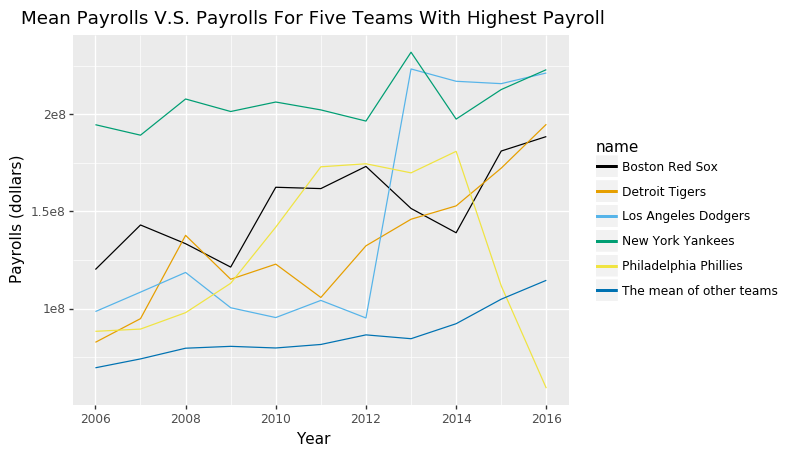

<ggplot: (301051933)>

In [448]:
(
    ggplot(comparison,aes(x = 'yearID',y = 'payrolls',color = 'name')) + geom_line()
    +scale_colour_manual(values=["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442","#0072B2"])
    +labs(title = "Mean Payrolls V.S. Payrolls For Five Teams With Highest Payroll",y = 'Payrolls (dollars)',
          x = 'Year')  
)

1.1.4 From this plot, we can see that except for 2016, the payrolls of 5 teams are all higher than the mean payrolls of other teams in each year over this time period. In 2016, the payrolls of Philadelphia Phillies is lower than the mean payrolls of other teams, but the payrolls of other 4 teams are still higher than that. Moreover, similar to 5 teams had the highest payrolls, the mean payrolls of other teams also has an increasing general trend over this time period.

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

Problem1: Which teams are the league champion of 2017 and 2018? Did they still perform well from 2006 to 2016? More prcisely, how did the number of their winning games in each year change? How did they compare with other teams? Was the number of winning games related to their payrolls?

In [533]:
#See which teams are the league champion of 2017 and 2018
result = pd.read_sql("""
    SELECT lgID,name,yearID FROM Teams WHERE LgWin = 'Y' AND yearID BETWEEN 2017 AND 2018
""", db)
result

,lgID,name,yearID
0,AL,Houston Astros,2017
1,NL,Los Angeles Dodgers,2017
2,AL,Boston Red Sox,2018
3,NL,Los Angeles Dodgers,2018


In [565]:
#subset the teams that are the league champion of 2017 and 2018,see their payrolls and wins situation from 2006 to 2016.
champion_teams = pd.read_sql("""
    SELECT l.payrolls as payrolls,l.yearID,l.teamID,r.W,r.name FROM
        (SELECT SUM(salary) AS payrolls,* FROM Salaries 
        GROUP BY teamID,yearID Having yearID BETWEEN 2006 AND 2016 ) AS l
    INNER JOIN
        Teams AS r
    ON (l.teamID = r.teamID AND l.yearID = r.yearID)
    WHERE name IN(
        'Houston Astros','Los Angeles Dodgers','Boston Red Sox'
    )
""", db)


In [566]:
#Get the mean of winning games of all teams
mean_wins = pd.read_sql("""
    SELECT yearID,AVG(W) as W FROM Teams 
    GROUP BY yearID HAVING yearID BETWEEN 2006 and 2016
""", db)

In [567]:
#Concat them together
mean_wins['name'] = 'The mean of other teams'
Compare = pd.concat([champion_teams,mean_wins],sort=False)

In [568]:
#Get the winning games plot
p1 = (ggplot(Compare,aes(x = 'yearID',y = 'W',color = 'name')) + geom_line()
+scale_colour_manual(values=["#000000", "#E69F00", "#56B4E9",'#0072B2'])
+labs(title = "Wins From 2006 To 2016 For League Champions In 2017 And 2018",y = 'The number of winning games',x = 'Year'))

In [569]:
#Get the payrolls plot
p2 = (ggplot(champion_teams,aes(x = 'yearID',y = 'payrolls',color = 'name')) + geom_line()
+scale_colour_manual(values=["#000000", "#E69F00", "#56B4E9"])
+labs(title = "Payrolls From 2006 To 2016 For League Champions In 2017 And 2018",y = 'Payrolls (dollars)',x = 'Year'))

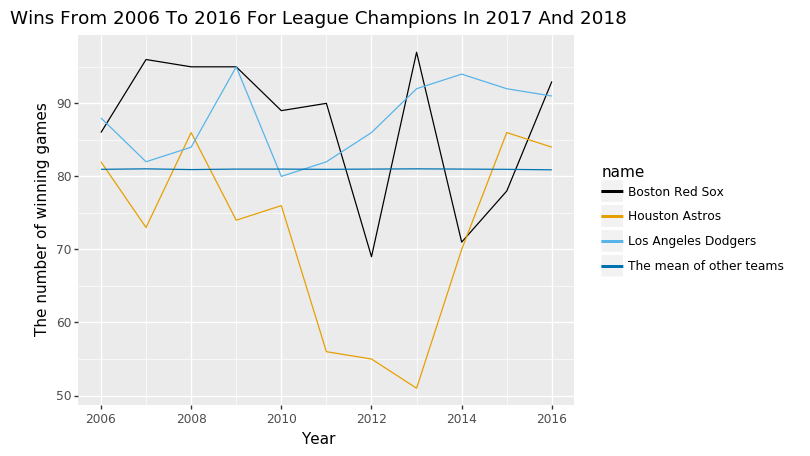

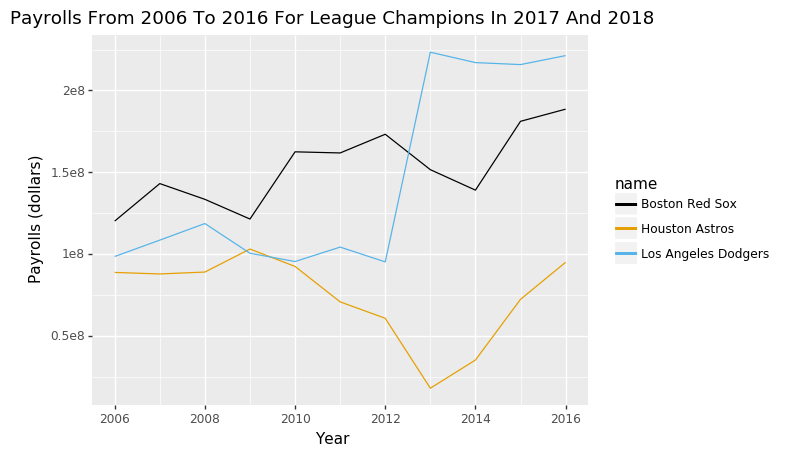

(<ggplot: (-9223372029297231735)>, <ggplot: (-9223372029297240106)>)

In [570]:
p1,p2

Houston Astros and Boston Red Sox are 2017 and 2018 champion of American league; Los Angeles Dodgers is 2017 and 2018 champion of National league. From the plot 'Wins From 2006 To 2016 For League Champions In 2017 And 2018', Since the fluctuation of the line representing Los Angeles Dodgers is small compared with other two lines, and Los Angeles Dodgers wins more game than average at most of time except 2010, we can conclude that the performance of Los Angeles Dodgers is good and stable. The overall performance of Boston Red Sox is also good since it wins more game than Los Angeles Dodgers in most years, but its fluctuation is larger than Los Angeles Dodgers especially from 2012 to 2016. It does not perform well in 2012,2014 and 2015 since it wins less games than mean. As for Houston Astros, we can see that its overall performance is not good since Houston Astros wins less game than the mean at most time. Also, its performance is not stable. More precisely, the general trend of its winning game decreases fast before 2013, but increases fast after 2013.

Moreover, from both plot, we can see that the payrolls and winning games are highly related for Houston Astros. That is to say, the general trend of its payroll and winning games both decrease before 2013 and increase after 2013. This may implies that the salaries that Houston Astros paid to players are 'worthy'. More precisely, More payrolls may help Houston Astros find better players and make the team perform well. However, the payrolls of Los Angeles Dodgers and Boston Red Sox are not highly related to their performance in each year. Even there is a large increase in payrolls in 2013 for Los Angeles Dodgers, its performance does not improve a lot in 2013. But there are still some patterns if we compare three teams together: the payrolls of Los Angeles Dodgers and Boston Red Sox are higher than that of Houston Astros at most of time, and the winning games of Los Angeles Dodgers and Boston Red Sox are also more than Houston Astros at most of time. Therefore, we can say that payrolls may have a positive effect on performance.

Problem2:From 2006 to 2016, how did the salaries of each position distrubuted? More precisely, did there exist any similar place between them? Which positions usually have higher salaries than others? Which positions do players with highest salaries play in? Is there anything that conflict with our common sense? If yes, explain the reason.

In [527]:
#Get the salaries of each position from 2006 to 2016
position_salary = pd.read_sql("""
    SELECT l.salary,l.yearID,r.POS FROM 
        (SELECT * FROM Salaries 
        WHERE yearID BETWEEN 2006 AND 2016)  AS l
        INNER JOIN
        FieldingPost AS r
        ON (l.playerID = r.playerID AND l.yearID = r.yearID)
""", db)

In [528]:
#Get the mean salary of eahc positions
mean_position_salary = pd.read_sql("""
    SELECT AVG(l.salary) as mean_salary,l.yearID,r.POS FROM 
        (SELECT * FROM Salaries 
        WHERE yearID BETWEEN 2006 AND 2016)  AS l
        INNER JOIN
        FieldingPost AS r
        ON (l.playerID = r.playerID AND l.yearID = r.yearID)
        GROUP BY r.POS
""", db)

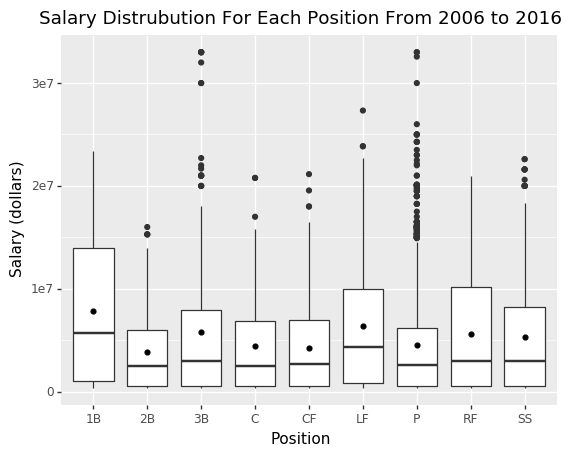

<ggplot: (-9223372029297441834)>

In [529]:
#A boxplot of Salary Distrubution For Each Position From 2006 to 2016 with mean
(
    ggplot(position_salary,aes(x = 'POS',y = 'salary'))+geom_boxplot()
    + geom_point(mean_position_salary,aes(x= 'POS',y ='mean_salary'))
    +labs(title = "Salary Distrubution For Each Position From 2006 to 2016",y = 'Salary (dollars)',x = 'Position')
)

From the boxplot, we can see that for all the positions, the mean salaries are higher than the median salaries. Also,the distance between 75th percntile and the median is much larger than the distance between 25th percentile and the median. Similarly, the maximum are much further away from the medain than the minimun. These show that for the palyers whose salaries are higher than median salaries, some of them can earn really high salaries. More precisely,some players' salaries are more than 10 times of median salaries. On the other hand, for players whose salaries are lower than the median, the difference between their salaries are much smaller compared with salaries higher than the median. 

In ths boxplot, it is not hard to see that the mean and median salaries of position 1B, LF are higher than others, so usually, it is earier for palyers in position 1B and LF to get a higher salary than players in other positions. However, some players in position 3B and P can get a much higher salary than all of the other players although their median and mean salaries are not high. Now, let's take a look at players in position P. In our common sense, pitchers are important in baseball matches and many MVPs are pitchers, but their median salaries are even lower than most of the positions. The reason is that there are two type of pitchers: relief pitchers and starting pitchers. Usually, starting pitchers' salaries are high, but relief pitchers' mean or median salaries are lower than most of the positions. We can see more detials in this link:https://www.businessinsider.com/chart-mlbs-highest-paid-positions-2014-7.

Problem3: Are there any relationships between the amount of schools for palyers to attend in each state and the amount of players in each state? Moreover,how the schools and players distrubuted amoung states?

In [641]:
#Get the amount of palyers and schools that palyers attend of each states
school = pd.read_sql('''
    SELECT l.School_amount,l.state,r.Player_amount FROM
        (SELECT COUNT(*) AS School_amount,state FROM Schools GROUP BY state) AS l
        INNER JOIN
        (SELECT COUNT(*) AS Player_amount, * FROM People GROUP BY birthState) AS r
        ON l.state = r.birthState
        ORDER BY Player_amount DESC
''',db)
school

,School_amount,state,Player_amount
0,136,CA,2275
1,72,PA,1440
2,55,NY,1230
3,61,IL,1070
4,42,OH,1049
5,80,TX,935
6,28,MA,671
7,32,MO,612
8,58,FL,555
9,31,MI,436


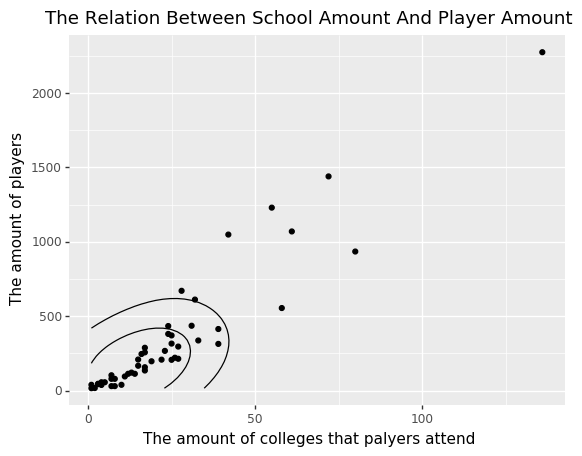

<ggplot: (283573487)>

In [647]:
(
    ggplot(school,aes(x = 'School_amount',y = 'Player_amount')) + geom_point() +geom_density_2d()
    + labs(title = "The Relation Between School Amount And Player Amount",y = 'The amount of players',
    x = 'The amount of colleges that palyers attend')
)

From the dot plot 'The Amount of Awards Won By Players', we can see that there may be a linear relationship between 
the amount of players and the amount of colleges that palyers attend. More precisely, With the increase of the amount of shools, the amount of players also increase. The amount of schools and the amount of players may have an interactive effect on each other. More precisely, if a state have an increasing amount of palyers, more schools having baseball teams may open to meet their requirements. On the other hand, if a state have more schools with famous baseball teams, it will make the baseball more popular in that state so that more people may want to be players. 

From the table, we can know that California, Pennsylvania and New York state have most players; they also have many schools for palyers to attend. In contrast, Wyoming, North Dakota have fewst players and they only have 1 or 2 schools for players to attend. Moreover, In the dot plot, we can see most states have less than 500 players and less than 30 schools. However, there are still some states that have much more players and school than other states. Especially, the point at the upper right corner is far away from other points, and the ponit represents California. More precisely, California have more than 2000 players and more than 125 schools for players to attend. Therefore, baseball may be more popular in California than other states.

In [646]:
db.close()